In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
img1 = cv2.imread('1metre.jpg')
print(img1.shape[:2])

(3024, 4032)


In [3]:
def show_image(image):
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(image)
    plt.show()

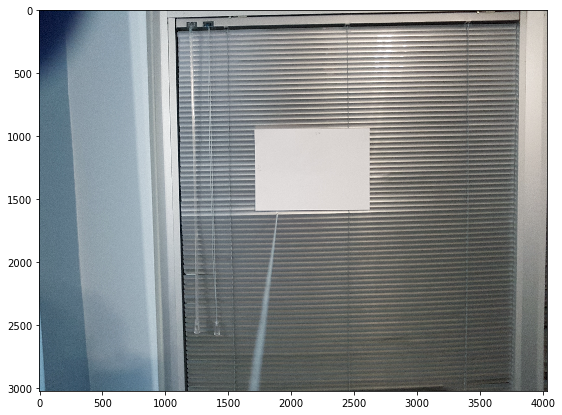

In [4]:
show_image(img1)

In [5]:
def masking(img):
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    #hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    # change it according to your need !
    lower_white = np.array([150,100,200], dtype=np.uint8)
    upper_white = np.array([255,255,255], dtype=np.uint8)
    # Threshold the RGB image to get only white colors
    mask = cv2.inRange(blur, lower_white, upper_white)
    kernel = np.ones((15, 15))
    img_thresh_opened = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    return img_thresh_opened

img res:


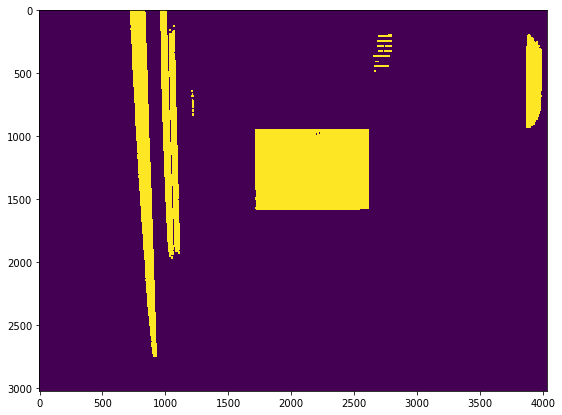

In [6]:
mask = masking(img1)
print("img res:")
show_image(mask)

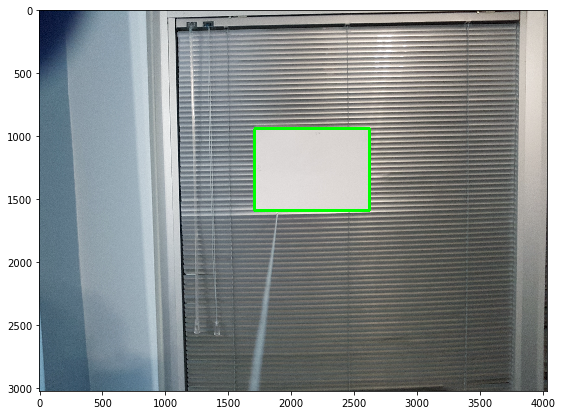

In [7]:
def find_rectangle(mask):
    ret, thresh = cv2.threshold(mask, 127, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, 1,2)

    c = max(contours, key = cv2.contourArea)

    x,y,w,h = cv2.boundingRect(c)
   
    return x,y,w,h

x1,y1,w1,h1 = find_rectangle(mask)
cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(0,255,0),20)
show_image(img1)

Odak uzaklığının bulunması için kullanacağım benzerlik:</br>
Odak uzaklığı = (resme olan uzaklık) * (resmin pikseli) / (gerçek uzunluk)

In [8]:
f = 100 * h1 / 20
print(f)

3250.0


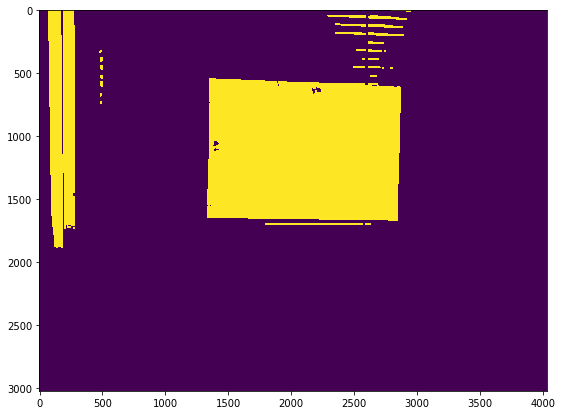

In [9]:
img2 = cv2.imread('60cm.jpg')
mask = masking(img2)
x2,y2,w2,h2 = find_rectangle(mask)
cv2.rectangle(img2,(x1,y1),(x1+w1,y1+h1),(0,255,0),20)
show_image(mask)

Yukarıdaki resmin kameraya olan uzaklığı 60 cmdir.

In [10]:
#20 kağıdın yaklaşık dik uzunluğudur
d = f*20 / h2
print(d)

57.57307351638618


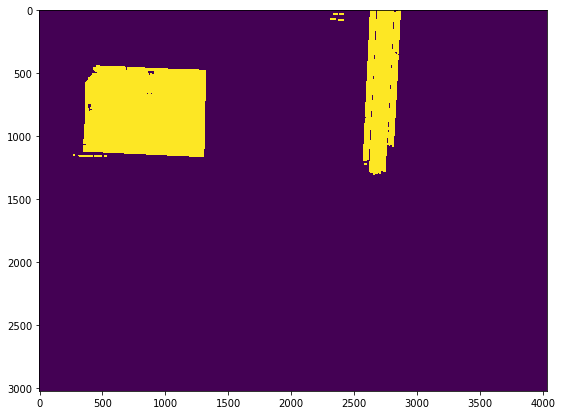

In [21]:
img3 = cv2.imread('25sag.jpg')
mask = masking(img3)
show_image(mask)

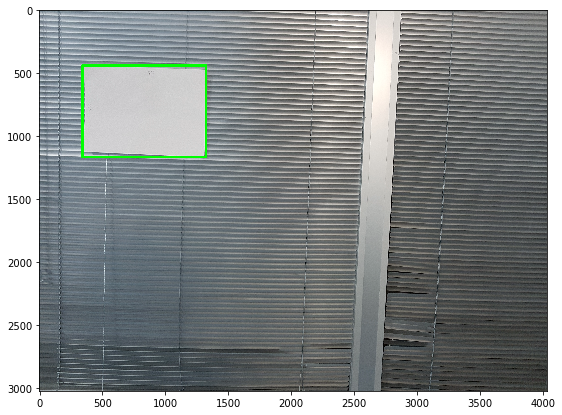

In [22]:
x3,y3,w3,h3 = find_rectangle(mask)
cv2.rectangle(img3,(x3,y3),(x3+w3,y3+h3),(0,255,0),20)
show_image(img3)

In [23]:
d = f*20 / h3
print(d)

89.40852819807428


Şu anda resmimizin kameraya olan dik uzaklığını biliyorum bize hipotenüs lazım kameranı gerçekte kağıda yanal olarak uzaklığı 25cm dir. Hipotenüsü bulmak için kağıdın merkezine olan açıyı bulmayı deniyeceğim.

In [24]:
center = int(x3 + w3/2)
print(x3,w3,center)

346 979 835


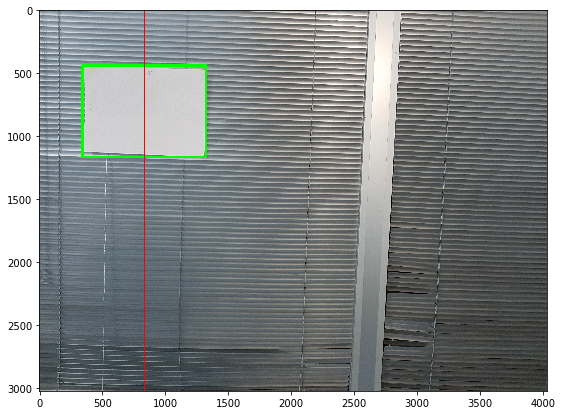

In [25]:
# Kağıt merkeine çizilmiş çizgi
cv2.line(img3,(center,0),(center,img3.shape[1]),(255,0,0),5)
show_image(img3)

In [26]:
# radiyusun derece çevrilme işlemi aşşağıdaki gibidir.
np.arctan(1)*180/np.pi

45.0

In [27]:
#Yanal açı: alfa = arctan(d/f)
alfa = np.arctan(center/f)
#radyusu derece olarak bastır
print(alfa*180/np.pi)

14.408961026183032


In [28]:
#tanjant formülü için radyus kullanılacak içine 45 derecenin radyusunu attım deneme amaçlı
np.tan(45*np.pi/180)

0.9999999999999999

In [29]:
#kamerayı ve resmi dik olarak düşünecek olursak uzaklık 90cm ve yanal uzaklık yaklaşık 25cm
#harita üzerindeki y ve x kordinatlarını değerlere atıyalım
y = f*20 / h3
x = np.tan(alfa)*y
print(x,y)

22.97111416781293 89.40852819807428
